In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns


import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
21
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import multiprocessing

In [3]:
iris = datasets.load_iris()
x = pd.DataFrame(iris.data[:, :], columns=[ 'SL', 'SW', 'PL', 'PW'])  
y = iris.target
x

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
scaler = StandardScaler()
scaler.fit(x)
x_stand=scaler.transform(x)

In [201]:
x_stand.var(axis=0)

array([1., 1., 1., 1.])

In [6]:
# Entrenamiento modelo PCA con escalado de los datos
# Por defecto, PCA() centra los valores pero no los escala. 
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(x)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [7]:
#components_ contiene el valor de los vectores a  que definen cada componente (eigenvector)
#Las filas se corresponden con las componentes principals (ordenadas de mayor a menor varianza explicada)
pd.DataFrame(data = modelo_pca.components_, columns = x.columns, index   = ['PC1', 'PC2', 'PC3', 'PC4'])

,SL,SW,PL,PW
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


In [ ]:
SL=a

la segunda componente recoge mayoritariamente la información correspondiente a SW. la cuarta componente recoge mayoritariamente la información correspondiente a PL.


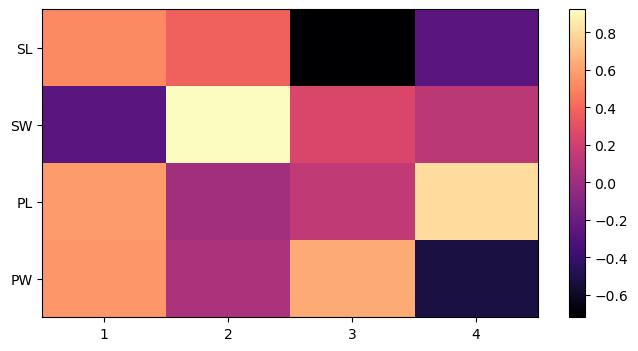

In [10]:

plt.figure(figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='magma', aspect='auto')
plt.yticks(range(len(x.columns)), x.columns)
plt.xticks(range(len(x.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.colorbar();

Porcentaje de varianza explicada por cada componente:
[0.72962445 0.22850762 0.03668922 0.00517871]
***
la varianza explicada por cada components:
[2.93808505 0.9201649  0.14774182 0.02085386]
***
Porcentaje de varianza explicada acumulada:
[0.72962445 0.95813207 0.99482129 1.        ]


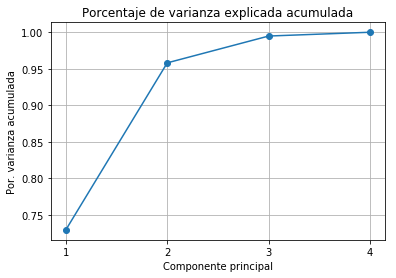

In [204]:
# Ahora vamos a ver la varianza explicada por cada una de components, 
#la proporción respecto al total y la proporción de varianza acumulada.

print('Porcentaje de varianza explicada por cada componente:')
print(modelo_pca.explained_variance_ratio_)
print('***')
print('la varianza explicada por cada components:')
print(modelo_pca.explained_variance_)
print('***')
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada:')
print(prop_varianza_acum)

fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(len(x.columns)) + 1, prop_varianza_acum,marker='o')
ax.set_xticks(np.arange(len(x.columns)) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
ax.grid()

Una vez entrenado el modelo, podemos reducir la dimensionalidad de nuevas observaciones proyectándolas en el espacio definido por las componentes.

In [205]:
# Proyección de las observaciones de entrenamiento
proyecciones = pca_pipe.transform(x)
proyecciones = pd.DataFrame(proyecciones, columns = ['PC1', 'PC2', 'PC3', 'PC4'], index = x.index)
proyecciones.head()

,PC1,PC2,PC3,PC4
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


La transformación es el resultado de multiplicar los vectores que definen cada componente con el set de datos.
Se Puede calcularla de forma manual también

In [11]:
#proyecciones = np.matmul(modelo_pca.components_, scale(x).T)
proyecciones = np.matmul(scale(x),modelo_pca.components_.T)
#proyecciones
proyecciones = pd.DataFrame(proyecciones)
#proyecciones = proyecciones.transpose().set_index(x.index)
proyecciones.head()

,0,1,2,3
0,-2.264703,0.480027,-0.127706,-0.024168
1,-2.080961,-0.674134,-0.234609,-0.103007
2,-2.364229,-0.341908,0.044201,-0.028377
3,-2.299384,-0.597395,0.091290,0.065956
4,-2.389842,0.646835,0.015738,0.035923


In [210]:
np.shape(modelo_pca.components_)

(4, 4)

Podemos revertir la transformación y reconstruir el valor inicial. La reconstrucción, solo será completa si hemos incluido todas las componentes.

In [13]:
# Recostruccion de las proyecciones
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(recostruccion, columns = x.columns, index = x.index)

print('Valores originales')
display(recostruccion.head())


print('Valores reconstruidos')
display(x.head())

Valores originales


,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Valores reconstruidos


,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Fat data

In [3]:
df = pd.read_csv('meatspec.csv')
df = df.drop(columns = df.columns[0])
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [4]:
y = df.fat
x = df.drop(['fat'], axis=1).astype('float64')

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
np.shape(x_train)

(150, 100)

(100.5, -0.5)

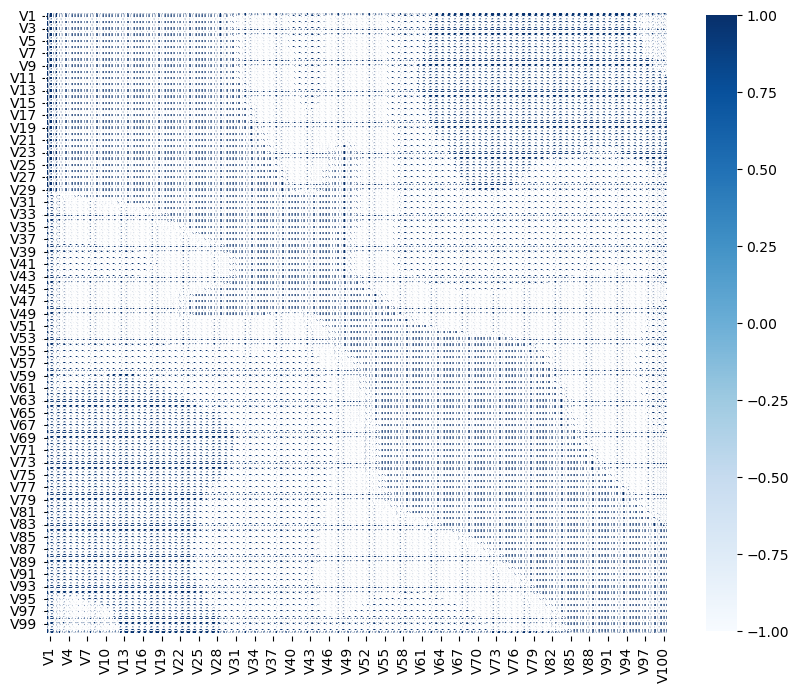

In [69]:
data_cor=x.corr()
plt.figure(figsize=(10,10))
ax=sns.heatmap(data_cor,  vmax=1, vmin=-1,cbar_kws={"shrink": .8},square=True, annot=True,fmt='.2f',center=0, cmap ='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [72]:
lr= LinearRegression()
results = lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)
train_score=lr.score(x_train, y_train)
test_score=lr.score(x_test, y_test)
print('train_score',train_score,'test_score',test_score)

train_score 0.9969619086881479 test_score 0.9066888183604515


In [71]:
x_stat=sm.add_constant(x_train)
model=sm.OLS( y_train, x_stat)
results=model.fit()
print('results.summary',results.summary())
print('results.params',results.params)
# residual standard error
# results.resid.std(ddof=x.shape[1])
# results.save(OLS_meatspec, remove_data=False)

results.summary                             OLS Regression Results                            
Dep. Variable:                    fat   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     160.8
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           3.73e-43
Time:                        08:39:53   Log-Likelihood:                -161.12
No. Observations:                 150   AIC:                             524.2
Df Residuals:                      49   BIC:                             828.3
Df Model:                         100                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4933      2.832    

In [73]:
# # Error de test del modelo 
# rmse_ols = mean_squared_error(y_true  = y_test, y_pred =y_pred, squared = False)
# print("")
# print(f"El error (rmse) de test es: {rmse_ols}")

Para combinar PCA con regresión lineal, creamos un pipeline que combine ambos procesos. 
Dado que no se puede conocer a priori el número de componentes óptimo, vamos a usar validación cruzada.

In [6]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=x_train, y=y_train)
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [7]:
train_score=pipe_modelado.score(x_train, y_train)
test_score=pipe_modelado.score(x_test, y_test)
print('train_score',train_score,'test_score',test_score)

train_score 0.9969619086881812 test_score 0.9066888183596856


In [102]:
# Predicciones test
#y_pred_pca = pipe_modelado.predict(X=x_test)
#y_pred_pca = predicciones.flatten()

# Error de test del modelo 
#rmse_pcr = mean_squared_error(y_true  = y_test, y_pred  = y_pred_pca, squared = False)

#print(f"El error (rmse) de test es: {rmse_pcr}")

El error (rmse) de test es: 3.7767776542590825


In [8]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Grid de hiperparámetros evaluados
param_grid = {'pca__n_components': [1, 2, 4, 6, 8, 10, 15, 20, 30, 40, 50, 60, 70, 80]}

# Búsqueda por grid search con validación cruzada
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'r2',#'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count(),
        cv         = KFold(n_splits=10), 
        refit      = True,
        verbose    = 0,
        return_train_score = True)

grid.fit(X = x_train, y = y_train)

# Resultados
results = pd.DataFrame(grid.cv_results_)
results


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.027500,0.011343,0.007301,0.002053,1,{'pca__n_components': 1},0.073171,0.161698,0.487124,-0.204003,...,0.206355,0.282446,0.266383,0.238765,0.245114,0.259850,0.239509,0.226335,0.245971,0.020066
1,0.022702,0.003715,0.006600,0.001562,2,{'pca__n_components': 2},0.323777,0.346503,0.512938,-0.153954,...,0.254331,0.330091,0.317971,0.285220,0.293154,0.297473,0.295477,0.283423,0.292615,0.019640
2,0.041903,0.012010,0.013000,0.008523,4,{'pca__n_components': 4},0.879635,0.692480,0.912197,0.868587,...,0.881730,0.887080,0.882588,0.881387,0.885582,0.887454,0.885880,0.890435,0.886834,0.005026
3,0.022401,0.003524,0.015001,0.007761,6,{'pca__n_components': 6},0.937302,0.908910,0.932019,0.953084,...,0.952171,0.949371,0.946163,0.948812,0.960404,0.947392,0.949203,0.949345,0.950483,0.003732
4,0.021999,0.005252,0.015100,0.012086,8,{'pca__n_components': 8},0.944136,0.904562,0.941736,0.951736,...,0.954604,0.953198,0.949355,0.952694,0.965710,0.950390,0.953046,0.952096,0.954022,0.004276
5,0.025801,0.013820,0.010600,0.011103,10,{'pca__n_components': 10},0.929083,0.912114,0.955828,0.956805,...,0.959700,0.959666,0.959761,0.959319,0.970050,0.957298,0.959178,0.959559,0.960662,0.003290
6,0.025600,0.014172,0.006901,0.001919,15,{'pca__n_components': 15},0.943179,0.939516,0.965590,0.947838,...,0.969968,0.971747,0.966851,0.970515,0.980205,0.969603,0.969817,0.970018,0.971070,0.003293
7,0.028899,0.005906,0.007901,0.007712,20,{'pca__n_components': 20},0.965705,0.936159,0.936662,0.971784,...,0.982129,0.978655,0.976250,0.981872,0.983464,0.978064,0.978135,0.979433,0.979766,0.002085
8,0.039099,0.021153,0.008901,0.004325,30,{'pca__n_components': 30},0.966787,0.952279,0.937517,0.978299,...,0.987712,0.985957,0.985686,0.985134,0.986874,0.985048,0.985284,0.985691,0.986083,0.000857
9,0.042200,0.018941,0.008301,0.005119,40,{'pca__n_components': 40},0.976580,0.964830,0.852255,0.971129,...,0.990817,0.989342,0.991147,0.990393,0.990818,0.989532,0.989861,0.989311,0.990071,0.000692


In [172]:
 multiprocessing.cpu_count()

4

In [9]:
# Solo necesitamos las columnas relacionada a numero de PC, mean test y train score y desviación estandar
results.filter(regex = '(param|mean_t|std_t)').drop(columns = 'params') \
.sort_values('mean_test_score', ascending = False)\
.head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
8,30,0.967936,0.015313,0.986083,0.000857
7,20,0.957386,0.030431,0.979766,0.002085
6,15,0.952142,0.032499,0.971070,0.003293


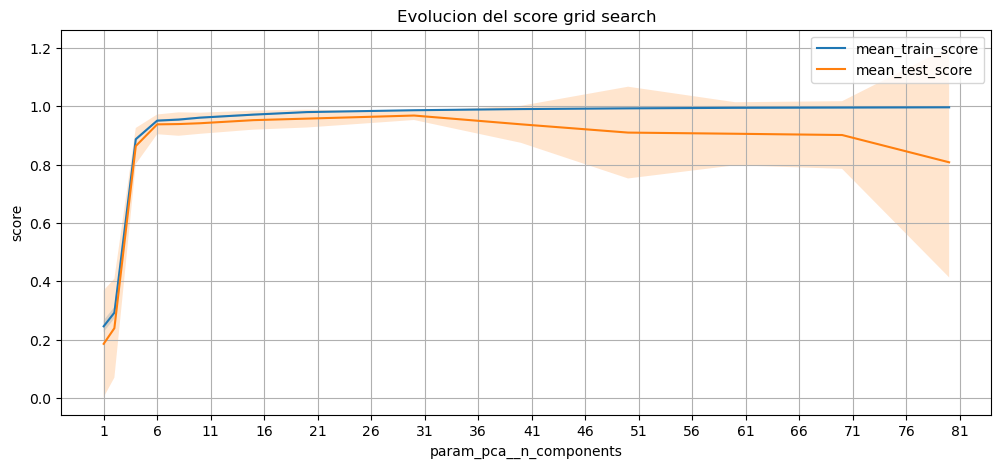

In [12]:
# Gráfico resultados validación cruzada para cada hiperparámetro

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5))

results.plot('param_pca__n_components', 'mean_train_score', ax=ax)
results.plot('param_pca__n_components', 'mean_test_score', ax=ax)

#incluir desviacion estandar
ax.fill_between(results.param_pca__n_components.astype(float),
                results['mean_train_score'] + results['std_train_score'],
                results['mean_train_score'] - results['std_train_score'],
                alpha=0.2)
ax.fill_between(results.param_pca__n_components.astype(float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'],
                 alpha=0.2)
ax.grid()
plt.xticks(range(1,85,5))
ax.legend()
ax.set_title('Evolucion del score grid search')
ax.set_ylabel('score');

In [99]:
print("Mejores hiperparámetros encontrados (cv)")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Mejores hiperparámetros encontrados (cv)
{'pca__n_components': 30} : 0.9679362494708398 r2


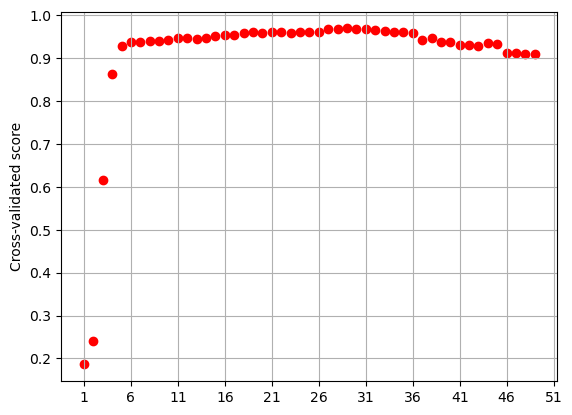

In [98]:
from sklearn.model_selection import cross_val_score
# search for an optimal value of K for KNN

# range of k we want to try
npc_range=range(1, 50)
# empty list to store scores
npc_scores = []


for k in npc_range:
    
    pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=k), LinearRegression())
    

    # score: Returns the mean accuracy on the given test data and labels.
    scores = cross_val_score(pipe_modelado, x_train, y_train, cv=10, scoring='r2')

    npc_scores.append(scores.mean())
    #print(scores)


#print('npc scores',npc_scores)
plt.scatter(npc_range, npc_scores,color='red')
plt.xlabel('')
plt.ylabel('Cross-validated score')
plt.xticks(range(1,55,5))
plt.grid()


Basado en validación cruzada, el mejor modelo, se obtiene empleando las 30 primeras componentes. Sin embargo, a partir de las 5 componentes el mejoramiento no es significativa. Por lo tanto podemos elegir el mejor modelo empleando las 6 primeras componentes.

In [100]:
# Entrenamiento modelo de regresión precedido por PCA con escalado

pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=6), LinearRegression())
pipe_modelado.fit(X=x_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=6)),
                ('linearregression', LinearRegression())])

In [101]:
# # Predicciones test para el mejor PCA con n_components=5
# y_pred_pcaopt = pipe_modelado.predict(X=x_test)

# # Error de test del modelo 
# rmse_pcr = mean_squared_error(y_true  = y_test,y_pred  = y_pred_pcaopt,squared = False)
# print("")
# print(f"El error (rmse) de test es: {rmse_pcr}")

train_score=pipe_modelado.score(x_train, y_train)
test_score=pipe_modelado.score(x_test, y_test)
print('train_score',train_score,'test_score',test_score)

train_score 0.9498470542214403 test_score 0.9312320191861228


In [ ]:
#n= len(X_train)
#p = i #len(X.columns)
#adj_R2 = 1- ((1-R2) * (n-1)/(n-p-1)) #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)
#adjustedr2.append(adj_R2)

## Hitters

In [13]:
df = pd.read_csv('Hitters.csv').dropna().drop('Player', axis=1)
df2=df.drop(['League', 'Division','NewLeague'],axis=1)
df2
#df.info()
#df
#dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
#dummies

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


In [21]:
print(df.columns)
print(df2.columns)

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')
Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')


In [15]:
y = df2.Salary#df2.iloc[:,-1]
x = df2.drop(['Salary'], axis=1).astype('float64')

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
np.shape(x_train)

(184, 16)

In [17]:
model = LinearRegression()
results = model.fit(x_train, y_train)
y_pred =model .predict(x_test)
print('y_pred_lr',np.shape(y_pred))

y_pred_lr (79,)


In [18]:
rmse_ols = mean_squared_error(y_true  = y_test, y_pred  =y_pred, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 358.3284597063359


In [19]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=x_train, y=y_train)
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [20]:
y_pred_pca = pipe_modelado.predict(X=x_test)
#y_pred_pca = predicciones.flatten()

# Error de test del modelo 
rmse_pcr = mean_squared_error(y_true  = y_test, y_pred  = y_pred_pca, squared = False)

print(f"El error (rmse) de test es: {rmse_pcr}")

El error (rmse) de test es: 358.32845970633593


In [31]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
# Grid de hiperparámetros evaluados
points_grid=16
param_grid = {'pca__n_components': np.linspace(1,16,points_grid, dtype=int)}
print('param_grid',param_grid)

# Búsqueda por grid search con validación cruzada
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count(),
        cv         = KFold(n_splits=10), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = x_train, y = y_train)

# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()


param_grid {'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.025902,0.013614,0.006000,0.003163,1,{'pca__n_components': 1},-457.458183,-308.090215,-357.800443,-270.720807,...,-339.038270,-347.125837,-353.536422,-329.663693,-350.311776,-351.450757,-347.047215,-312.151680,-339.816690,13.092446
1,0.015801,0.004916,0.004501,0.000500,2,{'pca__n_components': 2},-439.569093,-279.610730,-368.746120,-253.238715,...,-330.676740,-343.168464,-345.097027,-324.875044,-343.352082,-345.533429,-342.728503,-301.741886,-333.977687,13.588754
2,0.018700,0.012264,0.007500,0.006215,3,{'pca__n_components': 3},-441.589437,-284.883051,-367.497188,-251.216702,...,-330.590608,-342.810057,-344.713143,-324.754515,-343.306439,-345.206352,-341.970217,-301.533252,-333.604823,13.537140
3,0.016001,0.006098,0.006600,0.003136,4,{'pca__n_components': 4},-435.262073,-303.544145,-365.305164,-240.293163,...,-330.546850,-341.442236,-344.024096,-320.585115,-342.851012,-342.005088,-340.297101,-299.543065,-331.652691,13.612677
4,0.017101,0.011793,0.005000,0.000776,5,{'pca__n_components': 5},-423.660529,-309.677377,-345.961105,-253.005229,...,-327.502531,-336.840950,-339.747157,-320.578575,-336.612306,-338.086962,-332.402462,-293.299008,-327.555952,13.348514


In [34]:
# Solo necesitamos las columnas relacionada a numero de PC, mean test y train score y desviación estandar
resultados.filter(regex = '(param|mean_t|std_t)').drop(columns = 'params') \
.sort_values('mean_test_score', ascending = False)\
.head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
1,2,-324.109974,111.163551,-333.977687,13.588754
0,1,-324.567854,111.406883,-339.816690,13.092446
2,3,-325.108407,110.421294,-333.604823,13.537140


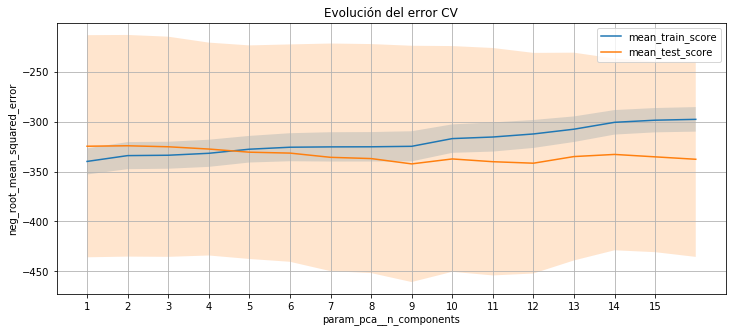

In [33]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharey=True)

resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados.param_pca__n_components.astype(float),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.grid()
plt.xticks(range(1,16))
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [42]:
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=9), LinearRegression())
pipe_modelado.fit(X=x_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=9)),
                ('linearregression', LinearRegression())])

In [44]:
y_pred_pcaopt = pipe_modelado.predict(X=x_test)
# Error de test del modelo 
rmse_pcr = mean_squared_error(y_true  = y_test,y_pred  = y_pred_pcaopt,squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 359.0483335247283


## Seatpos

In [48]:
df = pd.read_csv('seatpos.csv').dropna()
#df2=df.drop(['League', 'Division','NewLeague'],axis=1)
df
#df.info()
#df
#dummies = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
#dummies

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg,hipcenter
0,46,180,187.2,184.9,95.2,36.1,45.3,41.3,-206.300
1,31,175,167.5,165.5,83.8,32.9,36.5,35.9,-178.210
2,23,100,153.6,152.2,82.9,26.0,36.6,31.0,-71.673
3,19,185,190.3,187.4,97.3,37.4,44.1,41.0,-257.720
4,23,159,178.0,174.1,93.9,29.5,40.1,36.9,-173.230
5,47,170,178.7,177.0,92.4,36.0,43.2,37.4,-185.150
6,30,137,165.7,164.6,87.7,32.5,35.6,36.2,-164.750
7,28,192,185.3,182.7,96.9,35.8,39.9,43.1,-270.920
8,23,150,167.6,165.0,91.4,29.4,35.5,33.4,-151.780
9,29,120,161.2,158.7,85.2,26.6,31.0,32.8,-113.880


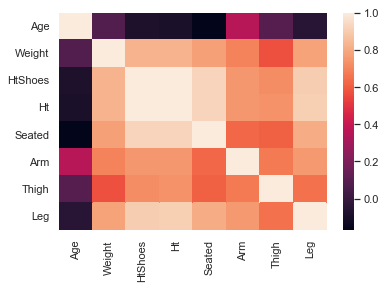

In [56]:
sns.set()
cor_sp = x.corr()
ax = sns.heatmap(cor_sp) 


In [49]:
y = df.hipcenter#df2.iloc[:,-1]
x = df.drop(['hipcenter'], axis=1).astype('float64')

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
np.shape(x_train)

(26, 8)

In [51]:
model = LinearRegression()
results = model.fit(x_train, y_train)
y_pred =model .predict(x_test)
print('y_pred_lr',np.shape(y_pred))

y_pred_lr (12,)


In [52]:
rmse_ols = mean_squared_error(y_true  = y_test, y_pred  =y_pred, squared = False)
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 50.63602675680516


In [66]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipem = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipem.fit(X=x_train, y=y_train)
pipem.set_params

modelo_pca = pipem.named_steps['pca']
modelo_pca

PCA()

In [71]:
modelo_pca.components_
modelo_pca.explained_variance_
modelo_pca.explained_variance_ratio_
np.cumsum(modelo_pca.explained_variance_ratio_) 


array([0.6986728 , 0.86151381, 0.91989442, 0.94984167, 0.97608844,
       0.99253489, 0.99979081, 1.        ])

Porcentaje de varianza explicada por cada componente:
[6.98672800e-01 1.62841014e-01 5.83806030e-02 2.99472554e-02
 2.62467663e-02 1.64464561e-02 7.25591309e-03 2.09191962e-04]
***
la varianza explicada por cada components:
[5.81295770e+00 1.35483724e+00 4.85726617e-01 2.49161165e-01
 2.18373095e-01 1.36834515e-01 6.03691969e-02 1.74047713e-03]
***
Porcentaje de varianza explicada acumulada:
[0.6986728  0.86151381 0.91989442 0.94984167 0.97608844 0.99253489
 0.99979081 1.        ]


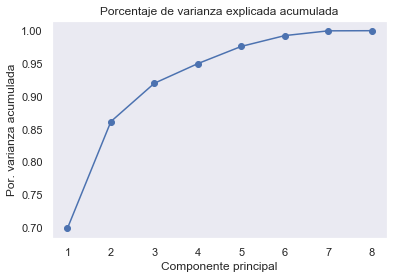

In [72]:

print('Porcentaje de varianza explicada por cada componente:')
print(modelo_pca.explained_variance_ratio_)
print('***')
print('la varianza explicada por cada components:')
print(modelo_pca.explained_variance_)
print('***')
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada:')
print(prop_varianza_acum)

fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(len(x.columns)) + 1, prop_varianza_acum,marker='o')
ax.set_xticks(np.arange(len(x.columns)) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
ax.grid()

In [73]:
pd.DataFrame(data = modelo_pca.components_, columns = x.columns, 
             index = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8'])

,Age,Weight,HtShoes,Ht,Seated,Arm,Thigh,Leg
PC1,-0.019099,0.355185,0.413377,0.413753,0.386979,0.329553,0.343347,0.393906
PC2,0.845106,0.065366,-0.105873,-0.117752,-0.242385,0.422971,0.135975,-0.017442
PC3,-0.137795,-0.639502,0.002658,0.012549,-0.027953,0.121364,0.729432,-0.155896
PC4,0.312360,0.330438,0.086035,0.060273,0.105945,-0.719513,0.408220,-0.294348
PC5,-0.409988,0.583489,-0.209796,-0.165461,-0.427501,0.271133,0.324543,-0.241787
PC6,-0.007036,-0.013964,-0.172237,-0.155442,-0.375836,-0.316939,0.202132,0.814474
PC7,-0.004539,0.103491,-0.500569,-0.497268,0.674697,0.076562,0.136501,0.108230
PC8,0.026726,-0.007427,-0.697317,0.715778,0.016290,-0.015418,-0.009515,-0.006874


In [81]:
#proyecciones = np.matmul(modelo_pca.components_, scale(x).T)
proyecciones = np.matmul(scale(x),modelo_pca.components_[:4,:].T)
#proyecciones
proyecciones = pd.DataFrame(proyecciones)
#proyecciones = proyecciones.transpose().set_index(x.index)
proyecciones.head()

,0,1,2,3
0,3.488229,0.715177,0.622515,0.223240
1,-0.658534,0.142870,-0.656835,-0.414981
2,-3.745178,-0.969409,0.755766,0.449737
3,3.935671,-0.817151,0.601243,-0.585441
4,0.814777,-1.337970,0.176280,0.651559


In [80]:
np.shape(modelo_pca.components_[:4,:].T)

(8, 4)

## Boston

In [81]:
# df = pd.read_csv('boston_house_prices.csv')
# df.head()
df = pd.read_csv('winequality-red.csv').dropna()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [82]:
# y = df.MEDV#df2.iloc[:,-1]
# x = df.drop(['MEDV'], axis=1).astype('float64')
# x
y = df.quality#df2.iloc[:,-1]
x = df.drop(['quality'], axis=1).astype('float64')
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


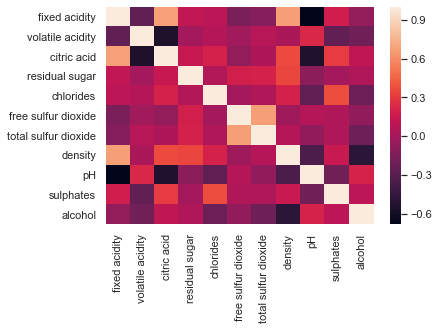

In [83]:
sns.set()
cor_sp = x.corr()
ax = sns.heatmap(cor_sp)

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
np.shape(x_train)

(1119, 11)

In [85]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipem = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipem.fit(X=x_train, y=y_train)
pipem.set_params

modelo_pca = pipem.named_steps['pca']
modelo_pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Porcentaje de varianza explicada por cada componente:
[0.28244425 0.18256886 0.13469101 0.10917033 0.08676998 0.05892168
 0.05311489 0.0395212  0.03084509 0.01648515 0.00546756]
***
la varianza explicada por cada components:
[3.10966567 2.0100538  1.4829263  1.20194773 0.95532354 0.6487182
 0.5847864  0.43512204 0.33959948 0.1814989  0.06019693]
***
Porcentaje de varianza explicada acumulada:
[0.28244425 0.46501311 0.59970412 0.70887444 0.79564443 0.85456611
 0.907681   0.9472022  0.97804729 0.99453244 1.        ]


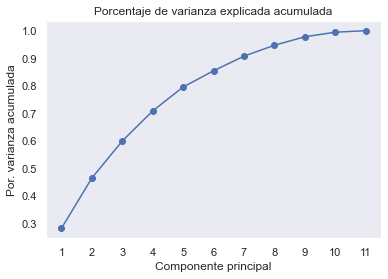

In [86]:

print('Porcentaje de varianza explicada por cada componente:')
print(modelo_pca.explained_variance_ratio_)
print('***')
print('la varianza explicada por cada components:')
print(modelo_pca.explained_variance_)
print('***')
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada:')
print(prop_varianza_acum)

fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(np.arange(len(x.columns)) + 1, prop_varianza_acum,marker='o')
ax.set_xticks(np.arange(len(x.columns)) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
ax.grid()

In [87]:
# pd.DataFrame(data = modelo_pca.components_, columns = x.columns, 
#              index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11', 'PC12','PC13'])
pd.DataFrame(data = modelo_pca.components_, columns = x.columns, 
             index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5', 'PC6', 'PC7', 'PC8','PC9', 'PC10', 'PC11'])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
PC1,0.482707,-0.239998,0.464777,0.163376,0.211645,-0.021724,0.035825,0.391026,-0.435291,0.254616,-0.113698
PC2,-0.124770,0.282248,-0.167500,0.292846,0.142118,0.512832,0.548748,0.237614,0.018039,-0.037287,-0.385304
PC3,-0.158060,-0.447756,0.219397,0.078021,-0.046056,0.423416,0.332384,-0.362376,0.045398,0.293055,0.457351
PC4,-0.232516,0.129450,-0.085904,-0.347287,0.683152,-0.082254,-0.050688,-0.155303,-0.012570,0.531904,-0.134015
PC5,-0.070406,0.210559,-0.036253,0.712901,0.228660,-0.140820,-0.241829,0.173584,0.301277,0.195001,0.389415
PC6,0.092331,0.398044,0.085326,0.073129,0.313526,-0.024784,0.138869,-0.377923,-0.510846,-0.423844,0.344639
PC7,-0.327802,-0.534606,0.114490,0.272747,0.382666,-0.072215,-0.152973,-0.135978,0.031286,-0.458171,-0.338829
PC8,-0.217073,-0.091269,-0.365100,0.356222,-0.320939,-0.248865,0.008557,-0.238678,-0.550164,0.339778,-0.210359
PC9,-0.209272,0.092137,0.379468,0.010213,-0.084644,-0.635973,0.594111,0.006322,0.192139,0.016776,-0.042227
PC10,-0.236771,0.374290,0.627716,0.091408,-0.236056,0.232978,-0.350453,-0.254840,0.001084,0.122900,-0.297652


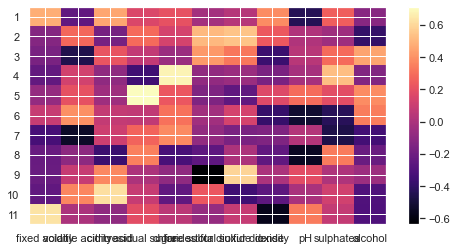

In [88]:
plt.figure(figsize=(8, 4))
componentes = modelo_pca.components_
plt.imshow(componentes, cmap='magma', aspect='auto')
plt.xticks(range(len(x.columns)), x.columns)
plt.yticks(range(len(x.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.colorbar();

In [89]:
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=x_train, y=y_train)
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)>

In [90]:
points_grid=11
param_grid ={'pca__n_components': np.linspace(1,11,points_grid, dtype=int)}# {'pca__n_components': np.linspace(1,13,points_grid, dtype=int)}
print('param_grid',param_grid)

# Búsqueda por grid search con validación cruzada
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_mean_squared_error', #'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count(),
        cv         = KFold(n_splits=10), 
        refit      = True,
        verbose    = 0,
        return_train_score = True)

grid.fit(X = x_train, y = y_train)

# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()


param_grid {'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.018701,0.004648,0.004001,0.001265,1,{'pca__n_components': 1},-0.622589,-0.684387,-0.675816,-0.776650,...,-0.662366,-0.653297,-0.674332,-0.661778,-0.662742,-0.652701,-0.672238,-0.670878,-0.664345,0.007163
1,0.016601,0.007059,0.004900,0.002843,2,{'pca__n_components': 2},-0.561658,-0.531237,-0.571699,-0.653379,...,-0.542875,-0.535523,-0.552066,-0.549156,-0.550726,-0.552594,-0.571736,-0.553125,-0.550985,0.008665
2,0.014699,0.007029,0.002900,0.000537,3,{'pca__n_components': 3},-0.539515,-0.458164,-0.476724,-0.498191,...,-0.456537,-0.455899,-0.461719,-0.446387,-0.460910,-0.444388,-0.462987,-0.452597,-0.454021,0.006469
3,0.014201,0.005251,0.004200,0.003969,4,{'pca__n_components': 4},-0.543831,-0.455414,-0.468746,-0.502588,...,-0.447828,-0.443538,-0.458010,-0.444056,-0.455862,-0.442871,-0.458571,-0.452434,-0.449172,0.006504
4,0.014200,0.007587,0.003700,0.002795,5,{'pca__n_components': 5},-0.552274,-0.453744,-0.457038,-0.510070,...,-0.440462,-0.433904,-0.446045,-0.437364,-0.449193,-0.436805,-0.454303,-0.443064,-0.441135,0.006934


In [91]:
# Solo necesitamos las columnas relacionada a numero de PC, mean test y train score y desviación estandar
resultados.filter(regex = '(param|mean_t|std_t)').drop(columns = 'params') \
.sort_values('mean_test_score', ascending = False)\
.head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
9,10,-0.437428,0.066906,-0.425807,0.007385
8,9,-0.437677,0.069583,-0.427563,0.007817
10,11,-0.439169,0.065716,-0.425469,0.007231


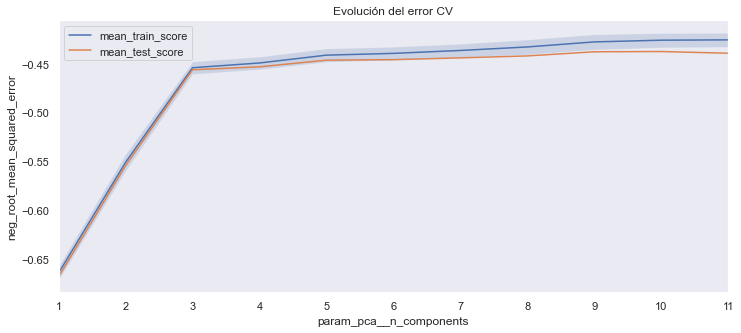

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 5), sharey=True)

resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(float),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
# ax.fill_between(resultados.param_pca__n_components.astype(float),
#                 resultados['mean_test_score'] + resultados['std_test_score'],
#                 resultados['mean_test_score'] - resultados['std_test_score'],
#                 alpha=0.2)
ax.grid()
plt.xticks(range(1,12))
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [97]:

pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=8), LinearRegression())
pipe_modelado.fit(X=x_train, y=y_train)
y_pred_pcaopt = pipe_modelado.predict(X=x_test)
# Error de test del modelo 
rmse_pcr = mean_squared_error(y_true  = y_test ,y_pred  = y_pred_pcaopt,squared = True)
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.4153952722191282


In [95]:
model = LinearRegression()
results = model.fit(x_train, y_train)
y_pred =model .predict(x_test)
print('y_pred_lr',np.shape(y_pred))
#predicciones = predicciones.flatten()
# Error de test del modelo 
rmse_ols = mean_squared_error(y_true  = y_test, y_pred  =y_pred, squared = True)
print("")
print(f"El error (rmse) de test es: {rmse_ols}")

y_pred_lr (480,)

El error (rmse) de test es: 0.40078036637500436


## Image compression

(563, 563, 3)
250


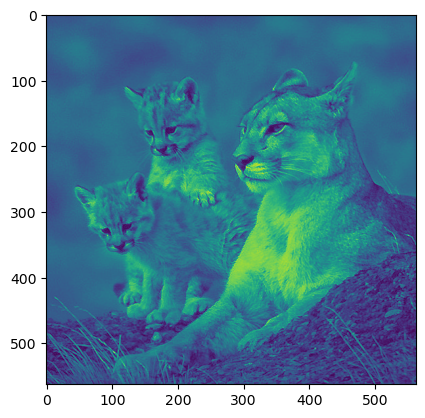

In [31]:

from matplotlib.image import imread


image_raw = imread("puma_2.jpg")
print(np.shape(image_raw))
print(image_raw[:,:,2].max())
#plt.imshow(image_bw)

(563, 563)
1.0


Text(0.5, 1.0, '563 PCs')

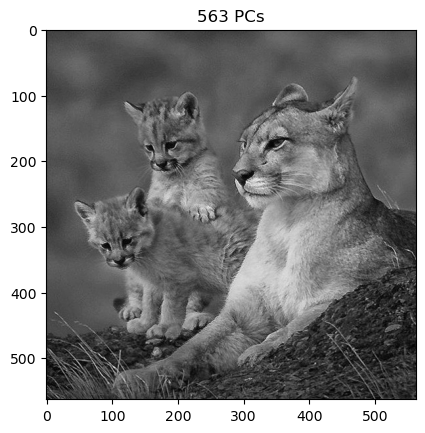

In [35]:
#converting the image to black and white
image_sum = image_raw.sum(axis=2)
print(np.shape(image_sum))
#Normalizing the 
image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure()
plt.imshow(image_bw, cmap=plt.cm.gray);
plt.title(f"{image_sum.shape[0]} PCs")

In [44]:
pca = PCA()
pca.fit(image_bw)

PCA()

In [59]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

# Seeing how many PCs explain 0.95 of the variance
por1=0.95
k = np.argmax(var_cumu>por1)
print("PCs explaining 0.95 of variance:", k)


PCs explaining 0.95 of variance: 101


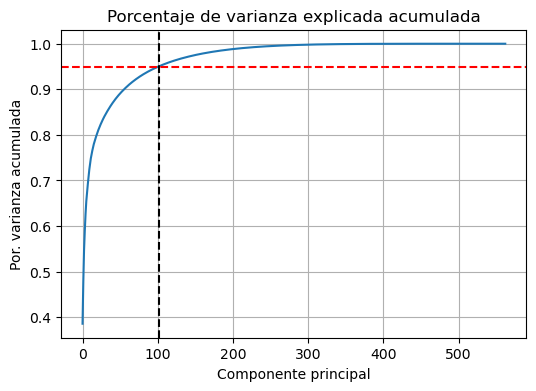

In [46]:
fig, ax = plt.subplots(figsize=(6, 4))
plt.plot(var_cumu)
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=0.95, color="r", linestyle="--")
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
ax.grid()

Text(0.5, 1.0, '101 PCs')

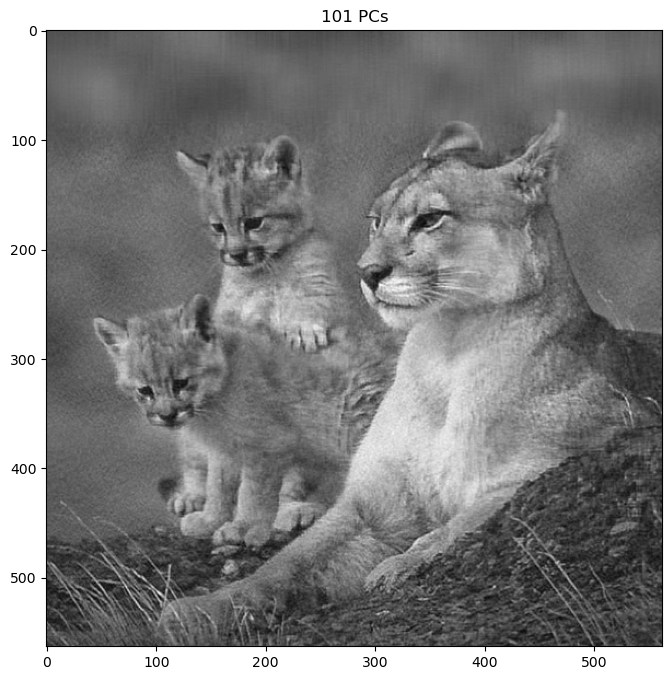

In [60]:
ipca = PCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

plt.figure(figsize=(12,8))
plt.imshow(image_recon,cmap = plt.cm.gray)
plt.title(f"{k} PCs")

In [61]:
por2=0.9
k2 = np.argmax(var_cumu>por2)
print(f"PCs explaining {por2} of variance:", k2)

PCs explaining 0.9 of variance: 56


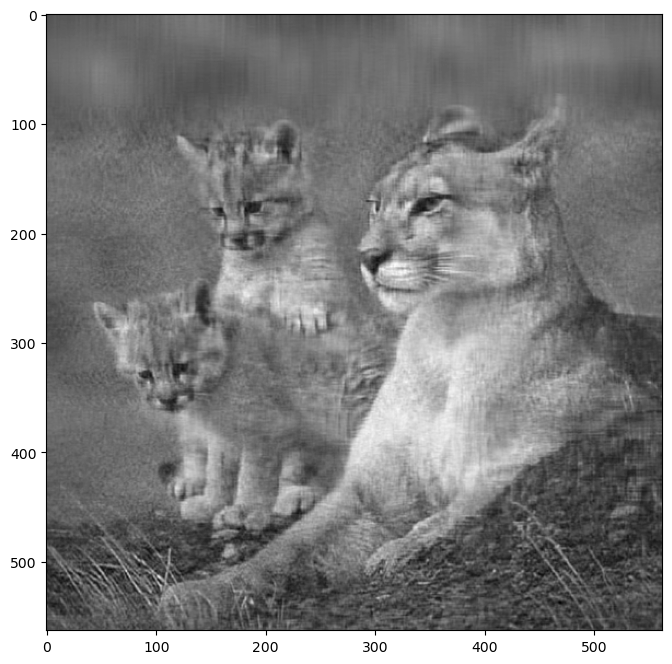

In [58]:
ipca = PCA(n_components=k2)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

plt.figure(figsize=(12,8))
plt.imshow(image_recon,cmap = plt.cm.gray)